In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
data = pd.read_excel('/content/iris.xls')
data.head(10)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [31]:
data.shape

(150, 5)

In [11]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [32]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [33]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [34]:
data['Classification'].value_counts()

Classification
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [36]:
# 2 Preprocessing - fill null places with median value


data['SL']=data['SL'].fillna(data['SL'].median())
data['SW']=data['SW'].fillna(data['SW'].median())
data['PL']=data['PL'].fillna(data['PL'].median())
data['PW']=data['PW'].fillna(data['PW'].median())

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [38]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [39]:
data['Classification'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [41]:
#Find out which classification model gives the best result

y = data['Classification']
x = data.drop(['Classification'],axis=1)

In [42]:
x.shape

(150, 4)

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)


In [57]:
x_train.shape

(105, 4)

In [58]:
x_test.shape

(45, 4)

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [61]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(x_train,y_train)


LogisticRegression()

In [90]:
y_pred = log_model.predict(x_test)


In [67]:
from sklearn.metrics import confusion_matrix , accuracy_score ,precision_score , recall_score,f1_score
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred,average='micro'))
print('Recall is', recall_score(y_test, y_pred,average='micro'))
print('F1 Score is', f1_score(y_test, y_pred,average='micro'))

Accuracy is 0.9333333333333333
Precision is 0.9333333333333333
Recall is 0.9333333333333333
F1 Score is 0.9333333333333333


In [68]:
confusion_matrix(y_test,y_pred)


array([[19,  0,  0],
       [ 0, 10,  3],
       [ 0,  0, 13]])

In [69]:
### KNN CLASSIFIER
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(1,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    classifier.fit(x_train,y_train)
    y_pred = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    metric_k.append(acc)

metric_k

[0.9111111111111111,
 0.9777777777777777,
 0.9111111111111111,
 1.0,
 0.9777777777777777,
 1.0,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 1.0,
 1.0,
 1.0,
 0.9777777777777777,
 1.0]

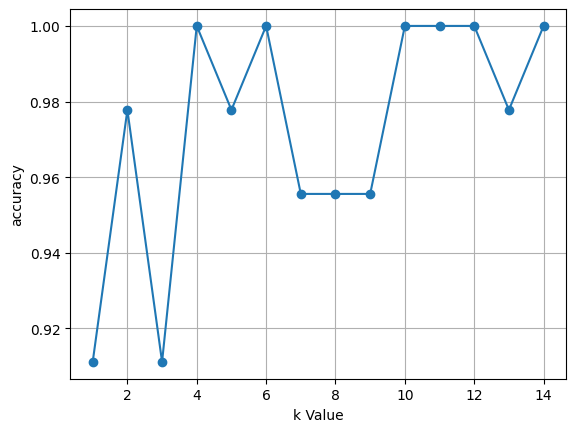

In [70]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k Value')
plt.ylabel('accuracy')
plt.grid()

In [79]:
classifier = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
classifier.fit(x_train,y_train)
y_pred_knn = classifier.predict(x_test)
print('Accuracy is', accuracy_score(y_test, y_pred_knn))
print('Precision is', precision_score(y_test, y_pred_knn,average='micro'))
print('Recall is', recall_score(y_test, y_pred_knn,average='micro'))
print('F1 Score is', f1_score(y_test, y_pred_knn,average='micro'))


Accuracy is 0.9111111111111111
Precision is 0.9111111111111111
Recall is 0.9111111111111111
F1 Score is 0.9111111111111111


In [80]:
classifier = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
classifier.fit(x_train,y_train)
y_pred_knn = classifier.predict(x_test)
print('Accuracy is', accuracy_score(y_test, y_pred_knn))
print('Precision is', precision_score(y_test, y_pred_knn,average='micro'))
print('Recall is', recall_score(y_test, y_pred_knn,average='micro'))
print('F1 Score is', f1_score(y_test, y_pred_knn,average='micro'))


Accuracy is 0.9111111111111111
Precision is 0.9111111111111111
Recall is 0.9111111111111111
F1 Score is 0.9111111111111111


Support Vector Machine

In [81]:
from sklearn.svm import SVC
svm_clf = SVC(kernel='linear')
svm_clf.fit(x_train , y_train)
y_svm_prediction = svm_clf.predict(x_test)

In [82]:
print(confusion_matrix(y_test,y_svm_prediction))

[[19  0  0]
 [ 0  9  4]
 [ 0  0 13]]


In [83]:
print("accuracy score",accuracy_score(y_test,y_svm_prediction))

accuracy score 0.9111111111111111


In [84]:
svm_clf2 = SVC(kernel='poly')
svm_clf2.fit(x_train , y_train)
y_svm_prediction2 = svm_clf2.predict(x_test)
print(confusion_matrix(y_test,y_svm_prediction2))
print("accuracy score",accuracy_score(y_test,y_svm_prediction2))

[[17  2  0]
 [ 0 12  1]
 [ 0  1 12]]
accuracy score 0.9111111111111111


Decision Tree

In [85]:
from sklearn.tree import DecisionTreeClassifier
ds_clf= DecisionTreeClassifier(criterion='entropy')
ds_clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [86]:
y_pred_dt = ds_clf.predict(x_test)
print(confusion_matrix(y_test,y_pred_dt))
print("accuracy score",accuracy_score(y_test,y_pred_dt))

[[19  0  0]
 [ 0  6  7]
 [ 0  0 13]]
accuracy score 0.8444444444444444


Random Forest Classifier

In [87]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train, y_train)

RandomForestClassifier()

In [89]:
y_pred_rf = rf_clf.predict(x_test)

print(confusion_matrix(y_test,y_pred_rf))
print("accuracy score",accuracy_score(y_test,y_pred_rf))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
accuracy score 1.0


# Random Forest Classifier has Accuracy of 1